# "Building Energy Savings Guide: Spotting Best Upgrade Opportunities"


## Project Overview

This project is dedicated to leveraging the U.S. Energy Information Administration's (EIA) Commercial Buildings Energy Consumption Survey (CBECS) 2018 dataset. My primary goal is to identify commercial buildings that exhibit significant, targeted energy efficiency retrofit potential specifically for heating systems. This approach moves beyond general energy consumption benchmarking by pinpointing instances where a building's heating consumption is disproportionately high compared to its peers.


## Data Understanding

I am working with the $Commercial Buildings Energy Consumption Survey (CBECS) 2018$ dataset, obtained from the U.S. Energy Information Administration (EIA). This comprehensive national survey provides detailed information on U.S. commercial buildings, including their energy use broken down by specific end-uses, particularly heating.

## Dataset Overview
### Key Variables Used
For this analysis, my single target variable is `HIGH_HEATING_POTENTIAL`, a flag indicating whether a building has high potential for heating retrofits.

My input variables (features) were selected based on their importance in predicting heating potential. Key features include:

- Roof Construction (RFCNS): Type of roof construction.

- Heating Degree Days (HDD65): A climate variable indicating heating demand.

- Binned Square Footage (SQFT_BINNED): Categorized total square footage of the building.

- Weekly Operating Hours (WKHRS): How many hours the building typically operates per week.

- Wall Construction (WLCNS): Type of wall construction.

- Cooling Degree Days (CDD65):): A climate variable, also influencing heating dynamics indirectly.

- Occupancy Type (OCCUPYP): Whether the building is owner-occupied, rented, etc.

- Year Constructed (YRCONC): The year the building was built.


## Methodology
Here's how I approached this project:

1. Data Acquisition & Loading: I loaded the CBECS 2018 public-use microdata into a pandas DataFrame.

2. Exploratory Data Analysis (EDA): I examined the dataset's structure, variable types, and distributions, focusing on HIGH_HEATING_POTENTIAL and relevant features.

3. Feature Engineering: I calculated total heating energy consumption, defined peer groups based on building activity, climate, and size, and created the HIGH_HEATING_POTENTIAL target flag by comparing a building's consumption against its peers.

4. Data Preprocessing: I handled missing values by replacing special codes with NaN and then imputing them. I converted categorical features into numerical format using one-hot encoding, and scaled relevant numerical features. A critical step was selecting only the most impactful features based on initial importance analysis.

5. Model Training & Evaluation: I split the data into training and testing sets, applied SMOTE to address class imbalance for heating potential, and trained a Decision Tree Classifier. I evaluated its performance using classification reports, ROC curves, and confusion matrices.

6. Interpretation: I visualized the Decision Tree to understand its decision-making process.


## Data Loading
First, I load the CBECS 2018 public-use microdata file into a pandas DataFrame. This is the raw dataset I'll be working with.

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('DATA/cbecs2018_final_public.csv')
df

,PUBID,REGION,CENDIV,PBA,PUBCLIM,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,...,ZMFBTU,ZMFEXP,ZELCNS,ZELEXP,ZNGCNS,ZNGEXP,ZFKCNS,ZFKEXP,ZDHBTU,ZDHEXP
0,1,3,5,2,3,210000,8,1,4,2,...,0,0,0,0,9,9,1,1,0,0
1,2,4,9,2,4,28000,5,1,6,1,...,0,0,0,0,0,0,9,9,9,9
2,3,3,5,8,4,2100,2,1,4,2,...,0,0,0,0,9,9,9,9,9,9
3,4,3,7,5,5,240000,8,2,6,1,...,0,0,0,0,1,1,9,9,9,9
4,5,1,2,5,3,295000,8,3,6,2,...,0,0,0,0,0,0,9,9,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6431,6432,4,8,14,2,130000,7,1,1,2,...,0,0,0,0,0,0,9,9,9,9
6432,6433,3,7,1,4,1050,2,1,5,2,...,9,9,9,9,9,9,9,9,9,9
6433,6434,3,5,2,4,122000,7,2,6,1,...,1,1,1,1,9,9,9,9,9,9
6434,6435,3,5,23,4,15000,4,3,5,1,...,2,2,2,2,2,2,9,9,9,9


## Dataset Information

In [96]:
df.shape

(6436, 1249)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Columns: 1249 entries, PUBID to ZDHEXP
dtypes: float64(637), int64(612)
memory usage: 61.3 MB


In [98]:
df.describe()

,PUBID,REGION,CENDIV,PBA,PUBCLIM,SQFT,SQFTC,WLCNS,RFCNS,RFCOOL,...,ZMFBTU,ZMFEXP,ZELCNS,ZELEXP,ZNGCNS,ZNGEXP,ZFKCNS,ZFKEXP,ZDHBTU,ZDHEXP
count,6436.000000,6436.000000,6436.000000,6436.000000,6436.000000,6.436000e+03,6436.000000,6436.000000,6436.000000,6436.000000,...,6436.000000,6436.000000,6436.000000,6436.000000,6436.000000,6436.000000,6436.000000,6436.000000,6436.000000,6436.000000
mean,3218.500000,2.629739,5.105811,12.564947,3.646830,1.691617e+05,5.611871,2.379273,4.355811,1.501554,...,0.429459,0.449658,0.407085,0.441112,2.871193,2.909571,6.785270,6.804848,8.273928,8.275637
std,1858.057498,1.006943,2.439221,11.937664,1.701329,2.851251e+05,2.304431,1.741901,2.081375,0.500036,...,1.092531,1.093648,1.090856,1.093221,3.978072,3.954940,3.681433,3.647798,2.358672,2.353031
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.001000e+03,2.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1609.750000,2.000000,3.000000,5.000000,2.000000,1.125000e+04,4.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,9.000000,9.000000
50%,3218.500000,3.000000,5.000000,13.000000,3.000000,6.900000e+04,6.000000,1.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,9.000000,9.000000,9.000000
75%,4827.250000,3.000000,7.000000,16.000000,5.000000,2.100000e+05,8.000000,3.000000,6.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,6436.000000,4.000000,9.000000,91.000000,7.000000,2.100000e+06,10.000000,8.000000,8.000000,2.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [99]:
print(df.columns)

Index(['PUBID', 'REGION', 'CENDIV', 'PBA', 'PUBCLIM', 'SQFT', 'SQFTC', 'WLCNS',
       'RFCNS', 'RFCOOL',
       ...
       'ZMFBTU', 'ZMFEXP', 'ZELCNS', 'ZELEXP', 'ZNGCNS', 'ZNGEXP', 'ZFKCNS',
       'ZFKEXP', 'ZDHBTU', 'ZDHEXP'],
      dtype='object', length=1249)


In [100]:
df.duplicated().sort_values(ascending=False).head()

0       False
4287    False
4297    False
4296    False
4295    False
dtype: bool

### Initial Data Cleaning & Handling Special Codes
The CBECS dataset employs specific codes (`-2` for 'Not Applicable' and `-9` for 'Not Reported/Don't Know') to denote missing or non-applicable values. These codes have been converted into standard NaN (Not a Number) values, which can be effectively handled by pandas and other libraries during analysis and imputation..

In [101]:
# Replace CBECS-specific missing value codes with NaN
df.replace([-2, -9], np.nan, inplace=True)

df.isnull().sum().sort_values(ascending=False).head(20)

OTHTP_PR       6436
BLRWTLP_CO2    6436
PKGHP_OT       6436
OTHTP_CO       6436
BOILP_CO       6436
OTHTP_FK       6436
BLROTD_OT2     6436
BLRWTLP_OT2    6436
BLRRDFL_OT2    6436
OTCLP_NG       6436
OTCLP_FK       6436
OTCLP_PR       6436
BLRRAD_OT2     6436
OTCLP_ST       6436
BLRFNCL_OT2    6436
BLROTD_CO2     6436
BLRDUCT_OT2    6436
BLRRDFL_CO2    6436
BLRDUCT_CO2    6436
BLRFNCL_CO2    6436
dtype: int64

### Feature Engineering: Total End-Use Consumption
The total BTU (British Thermal Units) for major end-use categories such as heating, cooling, and lighting has been calculated to analyze energy consumption for specific purposes. This process involves summing up consumption from different fuel types (e.g., electricity, natural gas) for each end-use category.

In [102]:
#Identifying relevant raw end-use consumption columns (in MBtu)
end_use_total_columns_map = {
    'Heating': 'MFHTBTU',
    'Cooling': 'MFCLBTU',
    'Lighting': 'MFLTBTU',
    'WaterHeating': 'MFWTBTU',
    'Refrigeration': 'MFRFBTU',
    'Cooking': 'MFCKBTU',
    'Ventilation': 'MFVNBTU',
    'OfficeEquipment': 'MFOFBTU',
    'Computers': 'MFPCBTU',
    'Other': 'MFOTBTU',
}

# Creating new 'TOTAL_BTU' columns for each major end-use
for use, col_name_in_df in end_use_total_columns_map.items():
    if col_name_in_df in df.columns:
        df[f'TOTAL_BTU_{use.upper()}'] = df[col_name_in_df]
    else:
        df[f'TOTAL_BTU_{use.upper()}'] = 0.0
# This handles cases where an 'MF...BTU' column existed but contained NaN values.
for use in end_use_total_columns_map.keys():
    total_col_name = f'TOTAL_BTU_{use.upper()}'
    df[total_col_name].fillna(0.0, inplace=True)


# Display created columns (optional, for your own review)
df[['TOTAL_BTU_HEATING', 'TOTAL_BTU_COOLING', 'TOTAL_BTU_LIGHTING', 'TOTAL_BTU_WATERHEATING', 'TOTAL_BTU_REFRIGERATION', 'TOTAL_BTU_COOKING']].head()


,TOTAL_BTU_HEATING,TOTAL_BTU_COOLING,TOTAL_BTU_LIGHTING,TOTAL_BTU_WATERHEATING,TOTAL_BTU_REFRIGERATION,TOTAL_BTU_COOKING
0,10592748.0,1823745.0,1623736.0,375999.0,305105.0,0.0
1,199383.0,43482.0,167247.0,5281.0,226868.0,0.0
2,11021.0,2161.0,17750.0,799.0,2429.0,0.0
3,1135594.0,270861.0,1151578.0,20734.0,11998.0,0.0
4,3386445.0,0.0,683259.0,1125.0,3224.0,0.0


### Defining Peer Groups
Peer groups have been defined to identify "disproportionately high" energy consumption. Key characteristics such as the building's principal activity, climate region, and square footage range are used for this grouping. Rows with missing data in these critical grouping features have been removed.

In [103]:
# Creating a binned square footage feature from SQFT for peer grouping
if 'SQFT' in df.columns:
    df['SQFT'].fillna(df['SQFT'].median(), inplace=True)
    df['SQFT_BINNED'] = pd.qcut(df['SQFT'], q=5, labels=False, duplicates='drop')
else:
    df['SQFT_BINNED'] = 0 

In [104]:
# Defining peer group criteria based on common characteristics
peer_group_features = ['PBA', 'PUBCLIM', 'SQFT_BINNED']

# Dropping rows where critical peer group features are NaN
# This is crucial as these rows cannot be categorized for comparison
df.dropna(subset=peer_group_features, inplace=True)

# Calculate peer-group specific median and standard deviation for each total end-use
end_use_totals_to_analyze = [
    'TOTAL_BTU_HEATING',
    'TOTAL_BTU_COOLING',
    'TOTAL_BTU_LIGHTING',
    'TOTAL_BTU_REFRIGERATION',
    'TOTAL_BTU_COOKING',
    'TOTAL_BTU_VENTILATION',
    'TOTAL_BTU_OFFICEEQUIPMENT',
    'TOTAL_BTU_COMPUTERS',
    'TOTAL_BTU_OTHER'
]

for col in end_use_totals_to_analyze:
    df[col].fillna(0.0, inplace=True) # Ensure consistency for peer stats
    df[f'{col}_PEER_MEDIAN'] = df.groupby(peer_group_features)[col].transform('median')
    df[f'{col}_PEER_STD'] = df.groupby(peer_group_features)[col].transform('std')

df[['TOTAL_BTU_HEATING', 'TOTAL_BTU_HEATING_PEER_MEDIAN', 'TOTAL_BTU_HEATING_PEER_STD']]


,TOTAL_BTU_HEATING,TOTAL_BTU_HEATING_PEER_MEDIAN,TOTAL_BTU_HEATING_PEER_STD
0,10592748.0,2617961.0,3.303036e+06
1,199383.0,94688.0,3.291431e+05
2,11021.0,28497.0,3.818588e+04
3,1135594.0,128142.0,3.302638e+05
4,3386445.0,4200094.0,6.962940e+06
...,...,...,...
6431,3335629.0,6113255.0,4.194145e+06
6432,0.0,0.0,3.502415e+04
6433,931126.0,1095913.0,2.358298e+06
6434,133528.0,208351.5,3.625776e+05


### Creating Target Variables (High Potential Flags)
This is where I create my target (dependent) variables. For each end-use, I classify a building as having "High Potential" for energy efficiency retrofits if its consumption is significantly higher than its peer group's average, based on a combination of ratio and Z-score thresholds, and if it meets a minimum absolute consumption to ensure it's a meaningful consumer.

In [105]:
# Setting thresholds for 'disproportionately high' consumption
ratio_threshold = 1.5 
z_score_threshold = 1.5 
min_absolute_consumption_btu = 10000000

# Initializing binary target variables to 0 (No High Potential)
df['HIGH_HEATING_POTENTIAL'] = 0
df['HIGH_COOLING_POTENTIAL'] = 0
df['HIGH_LIGHTING_POTENTIAL'] = 0

for use in end_use_totals_to_analyze:
    potential_col_name = f'HIGH_{use.replace("TOTAL_BTU_", "").upper()}_POTENTIAL'
    current_btu_col = use
    peer_median_col = f'{use}_PEER_MEDIAN'
    peer_std_col = f'{use}_PEER_STD'

    # Calculate Z-score, safely handling cases where standard deviation is zero
    df[f'{current_btu_col}_ZSCORE'] = np.where(df[peer_std_col] == 0, 0,
                                             (df[current_btu_col] - df[peer_median_col]) / df[peer_std_col])

    # Define the condition for flagging high potential
    condition = (
        df[current_btu_col].notna() &
        df[current_btu_col] > min_absolute_consumption_btu &
        (df[current_btu_col] > (df[peer_median_col] * ratio_threshold)) &
        (df[f'{current_btu_col}_ZSCORE'] > z_score_threshold)
    )
    df.loc[condition, potential_col_name] = 1

print("High Heating Potential distribution:\n", df['HIGH_HEATING_POTENTIAL'].value_counts())
print("High Cooling Potential distribution:\n", df['HIGH_COOLING_POTENTIAL'].value_counts())
print("High Lighting Potential distribution:\n", df['HIGH_LIGHTING_POTENTIAL'].value_counts())


High Heating Potential distribution:
 1    5878
0     558
Name: HIGH_HEATING_POTENTIAL, dtype: int64
High Cooling Potential distribution:
 1    5721
0     715
Name: HIGH_COOLING_POTENTIAL, dtype: int64
High Lighting Potential distribution:
 1    6326
0     110
Name: HIGH_LIGHTING_POTENTIAL, dtype: int64


### Initial Feature Selection
Here, I separate my dataset into features (X), which are the independent variables I'll use for prediction, and targets (y), which are the "high potential" flags I just created. I also exclude columns that are identifiers, survey weights, original energy consumption values, or intermediate calculations used to create the targets.

In [106]:
target_cols = [
    'HIGH_HEATING_POTENTIAL',
]

pba_mapping = {
    1: 'Office', 2: 'Warehouse/Storeroom', 3: 'Public Assembly',
    4: 'Public Order & Safety', 5: 'Food Sales', 6: 'Food Service (General)',
    7: 'Health Care - Inpatient', 8: 'Health Care - Outpatient', 9: 'Lodging',
    10: 'Other', 11: 'Education', 12: 'Religious Worship', 13: 'Service',
    14: 'Retail', 15: 'Warehouse & Storage (General)', 16: 'Manufacturing',
    17: 'Research & Development', 18: 'Laboratory', 19: 'Food Service (Sit-down)',
    20: 'Food Service (Fast Food)', 21: 'Food Service (Cafeteria/Other)',
    22: 'Warehouse (Non-refrigerated)', 23: 'Warehouse (Refrigerated)',
    24: 'Data Center', 25: 'Strip Mall/Shopping Center', 26: 'Enclosed Mall',
}

df['PBA'] = df['PBA'].apply(lambda x: pba_mapping.get(x, 'UNKNOWN_PBA') if pd.notna(x) else 'UNKNOWN_PBA')

top_features_from_importance = [
    'RFCNS_6', 'HDD65', 'SQFT_BINNED_4', 'SQFT_BINNED_2', 'SQFT_BINNED_3',
    'SQFT_BINNED_1', 'WKHRS', 'WLCNS_5', 'RFCNS_4', 'CDD65',
    'OCCUPYP_nan', 'YRCONC_5', 'RFCNS_2', 'NFLOOR_2', 'YRCONC_3'
]

base_features_from_importance = set()
for feature in top_features_from_importance:
    if 'SQFT_BINNED' in feature:
        base_features_from_importance.add('SQFT_BINNED')
    elif 'PBA_' in feature:
        base_features_from_importance.add('PBA')
    elif 'RFCNS_' in feature:
        base_features_from_importance.add('RFCNS')
    elif 'WLCNS_' in feature:
        base_features_from_importance.add('WLCNS')
    elif 'OCCUPYP_' in feature:
        base_features_from_importance.add('OCCUPYP')
    elif 'YRCONC_' in feature:
        base_features_from_importance.add('YRCONC')
    else:
        base_features_from_importance.add(feature)

# Explicitly add the 4 requested categorical features for plotting, if not already included
features_for_plotting = ['PBA', 'PUBCLIM', 'SQFT_BINNED', 'ATTIC']
for feature in features_for_plotting:
    base_features_from_importance.add(feature)


final_selected_base_features = list(base_features_from_importance)

final_features_for_X = [col for col in final_selected_base_features if col in df.columns]

In [107]:
#Defining X and y

X = df[final_features_for_X].copy()
y = df[target_cols].copy()

X.shape, y.shape

((6436, 11), (6436, 1))

### Handling Remaining Missing Values in Features (Imputation)
After initial cleaning and feature selection, some independent variables (X) might still have missing values. I imputed these by filling numerical `NaNs` with the median value of their column and categorical NaNs with the `mode`. This ensures that the dataset is complete for machine learning.

#### Enhanced Robustness for Imputation and Feature Type Identification

In [108]:
# 1. Initial Type Coercion: Attempting to convert 'object' columns to numeric.
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# 2. Defining and managing numerical features that should be treated as categorical
known_numerical_as_categorical = [
    'PBA', 'PUBCLIM', 'SQFT_BINNED', 'NFLOOR', 'ATTIC', 'BASEMNT', 'WLCNS', 'RFCNS',
    'RENOV', 'OPEN24', 'HEATHOME', 'EQUIPM', 'FUELHEAT', 'AIRCOND', 'ACEQUIPM',
    'FUELH2O', 'MORETHAN1H2O', 'LGTINLED', 'LGTOUTLED', 'DISHWASH', 'CWASHER', 'DRYER',
    'MICRO', 'OCCUPYP', 'TYPEGLASS', 'WINFRAME', 'ELPERIPH', 'SMARTSPK', 'SSLIGHT',
    'SSTEMP', 'SSSECURE', 'ELECVEH', 'YRCONC', 'YRRENO_RANGE',
]

# Filtering 'known_numerical_as_categorical' to only include those actually in X's columns
known_numerical_as_categorical = [col for col in known_numerical_as_categorical if col in X.columns]

# 3. Force these known categorical-numeric columns to 'object' (string) dtype.
for col in known_numerical_as_categorical:
    X[col] = X[col].astype(str)

# 4. Re-identifying Numerical and Categorical Features based on CURRENT dtypes of X
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# 5. Imputing numerical NaNs with the median
for col in numerical_features:
    if X[col].isnull().any():
        X[col].fillna(X[col].median(), inplace=True)

# 6. Imputing categorical NaNs with the mode
for col in categorical_features:
    if X[col].isnull().any():
        mode_val_series = X[col].mode()
        if not mode_val_series.empty:
            X[col].fillna(mode_val_series[0], inplace=True)
        else:
            X[col].fillna('UNKNOWN_CATEGORY', inplace=True)

# 7. Final Verification: Checking for any remaining NaNs
nan_summary = X.isnull().sum()
remaining_nans = nan_summary[nan_summary > 0]
if remaining_nans.empty:
    pass
else:
    pass

### Encoding Categorical Features
Machine learning models typically require numerical input. Therefore, I converted all identified categorical features in X into a numerical format using One-Hot Encoding. This creates new binary (0 or 1) columns for each category, making the data suitable for model training.

In [109]:
# Converting identified categorical features to string type if they are numbers, for get_dummies
for col in categorical_features:
    X[col] = X[col].astype(str)

# Applying One-Hot Encoding
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

print(f"Shape of X after encoding: {X_encoded.shape}")
X_encoded.head()

Shape of X after encoding: (6436, 103)


,HDD65,WKHRS,CDD65,PUBCLIM_2,PUBCLIM_3,PUBCLIM_4,PUBCLIM_5,PUBCLIM_7,ATTIC_2,SQFT_BINNED_1,...,RFCNS_6,RFCNS_7,RFCNS_8,WLCNS_2,WLCNS_3,WLCNS_4,WLCNS_5,WLCNS_6,WLCNS_7,WLCNS_8
0,4463,70,1759,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2424,45,189,0,0,1,0,0,1,1,...,1,0,0,0,0,0,0,0,0,0
2,3218,48,2403,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1045,55,3041,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
4,5076,80,1316,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


# Exploratory Data Analysis (EDA): Visualizations

With the data prepared and features encoded, it's time to visualize the dataset. This helps me understand the distribution of my features, identify any patterns, and crucially, check the balance of my target variables (HIGH_HEATING_POTENTIAL, HIGH_COOLING_POTENTIAL, HIGH_LIGHTING_POTENTIAL). I'll use matplotlib and seaborn for these plots.

## Distribution of Target Variables

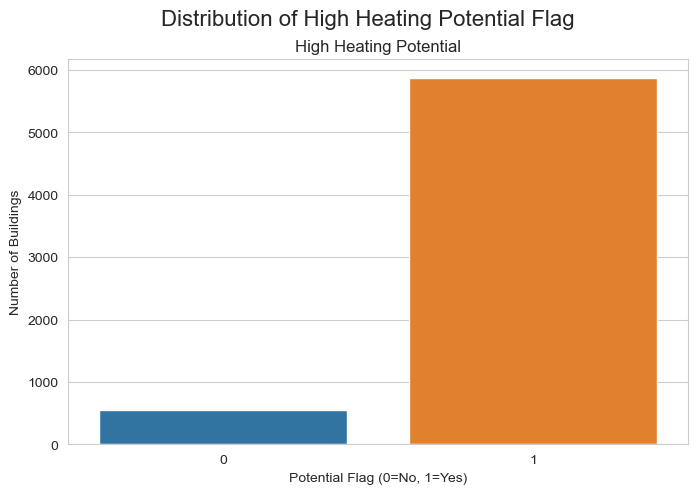

In [110]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
fig.suptitle('Distribution of High Heating Potential Flag', fontsize=16)

# Plot High Heating Potential
sns.countplot(x='HIGH_HEATING_POTENTIAL', data=y, ax=ax)
ax.set_title('High Heating Potential')
ax.set_xlabel('Potential Flag (0=No, 1=Yes)')
ax.set_ylabel('Number of Buildings')
plt.show()

The abovebar chart has been generated to understand the balance of the key target variables: `High Heating Potential`. This is crucial because a significant disparity between categories can hinder the machine learning models' ability to learn about less frequent cases.

#### High Heating Potential:

A count of 596 buildings has been flagged as having "High Heating Potential" (where the flag is 1). In contrast, 5878 buildings are categorized as 0 (No High Heating Potential). This indicates a significant class imbalance, with the number of buildings having high heating potential being much lower compared to those without. As a result, the model will encounter many more examples of "no potential" than "high potential," potentially leading to bias.

#### Takeaway:

The chart indicates that addressing class imbalance is necessary before training the machine learning models. Failure to do so may result in models that are proficient at identifying buildings without retrofit potential but perform poorly in identifying those with high potential, which is central to the project. Techniques such as oversampling, undersampling, or using algorithms designed to handle imbalance should be considered in the next steps of the modeling process.

## Distributions of Key Numerical Features

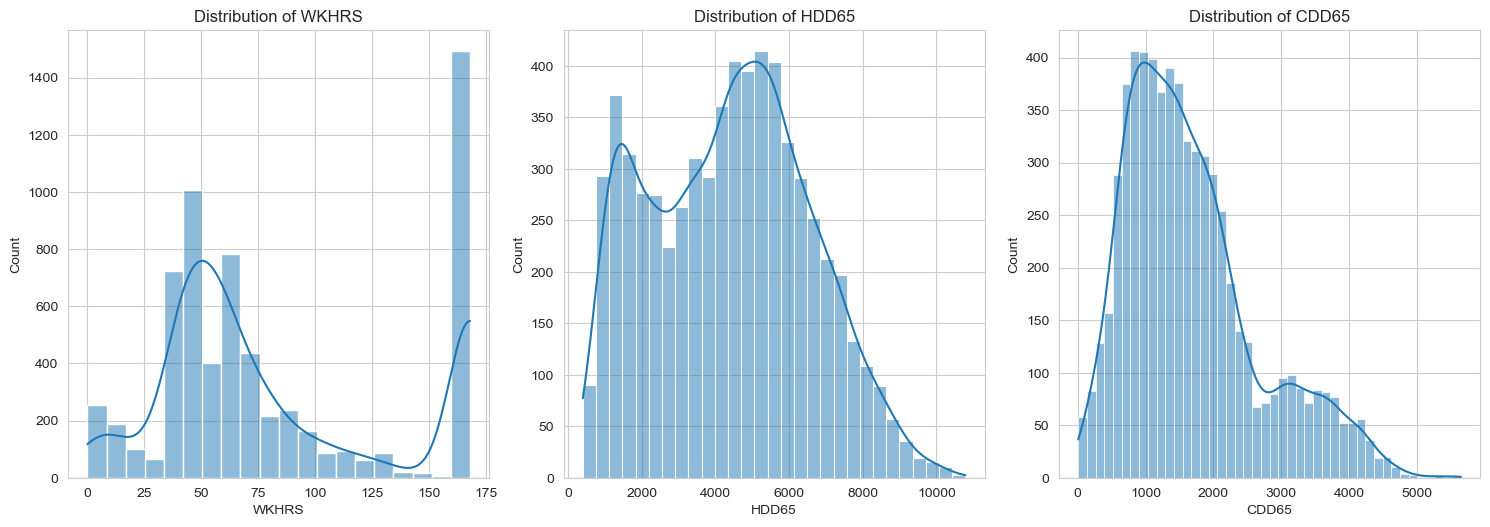

In [111]:
# Removed 'SQFT' as it's binned into 'SQFT_BINNED' in X.
numerical_features_to_plot = [
    'WKHRS', 'HDD65', 'CDD65',
]
numerical_features_to_plot = [f for f in numerical_features_to_plot if f in X.columns]

#histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

The histograms provide an understanding of how the key continuous and quasi-continuous input variables are distributed across the dataset.

### Observation:

#### Distribution of WKHRS (Weekly Operating Hours):

The chart displays a bimodal distribution, characterized by two peaks. A noticeable peak occurs around the 20-40 hour mark, likely representing buildings with standard business hours (e.g., typical Monday-Friday, 9-5 operations). Additionally, there is a very prominent second peak near 170 hours, at the far right. This suggests a significant number of buildings that operate almost continuously or 24/7 (e.g., hospitals, certain types of retail, data centers). Understanding this bimodal nature is important, as WKHRS is a key driver of energy use, and these distinct operating patterns will significantly impact energy consumption.

#### Distribution of HDD65 (Heating Degree Days):

This histogram illustrates the distribution of heating demand across different climate regions. It is a relatively smooth, somewhat skewed distribution, peaking around 4000-6000 `HDD65`. This indicates that a large portion of the buildings in the dataset are in climates that require a moderate to high amount of heating. The presence of a tail extending towards higher values suggests some buildings are in very cold climates. This variable will be crucial for predicting heating potential.

#### Distribution of CDD65 (Cooling Degree Days):

Similar to `HDD65`, this chart shows the distribution of cooling demand. It is also skewed but peaks at a lower value, around 1000-2000 CDD65. This indicates that many buildings in the dataset are in climates with moderate cooling needs, with fewer in extremely hot climates. This variable will be important for understanding cooling potential.

### Takeaway:

These visualizations confirm the characteristics of the numerical features.

- The `WKHRS` distribution is particularly interesting because it reveals distinct operational profiles that the model should be able to learn from.
- The climate data (`HDD65`, `CDD65`) shows the range of heating and cooling demands across the dataset.

Overall, these charts reinforce that there is a mix of distributions among the numerical features, which the chosen machine learning models will need to handle effectively.

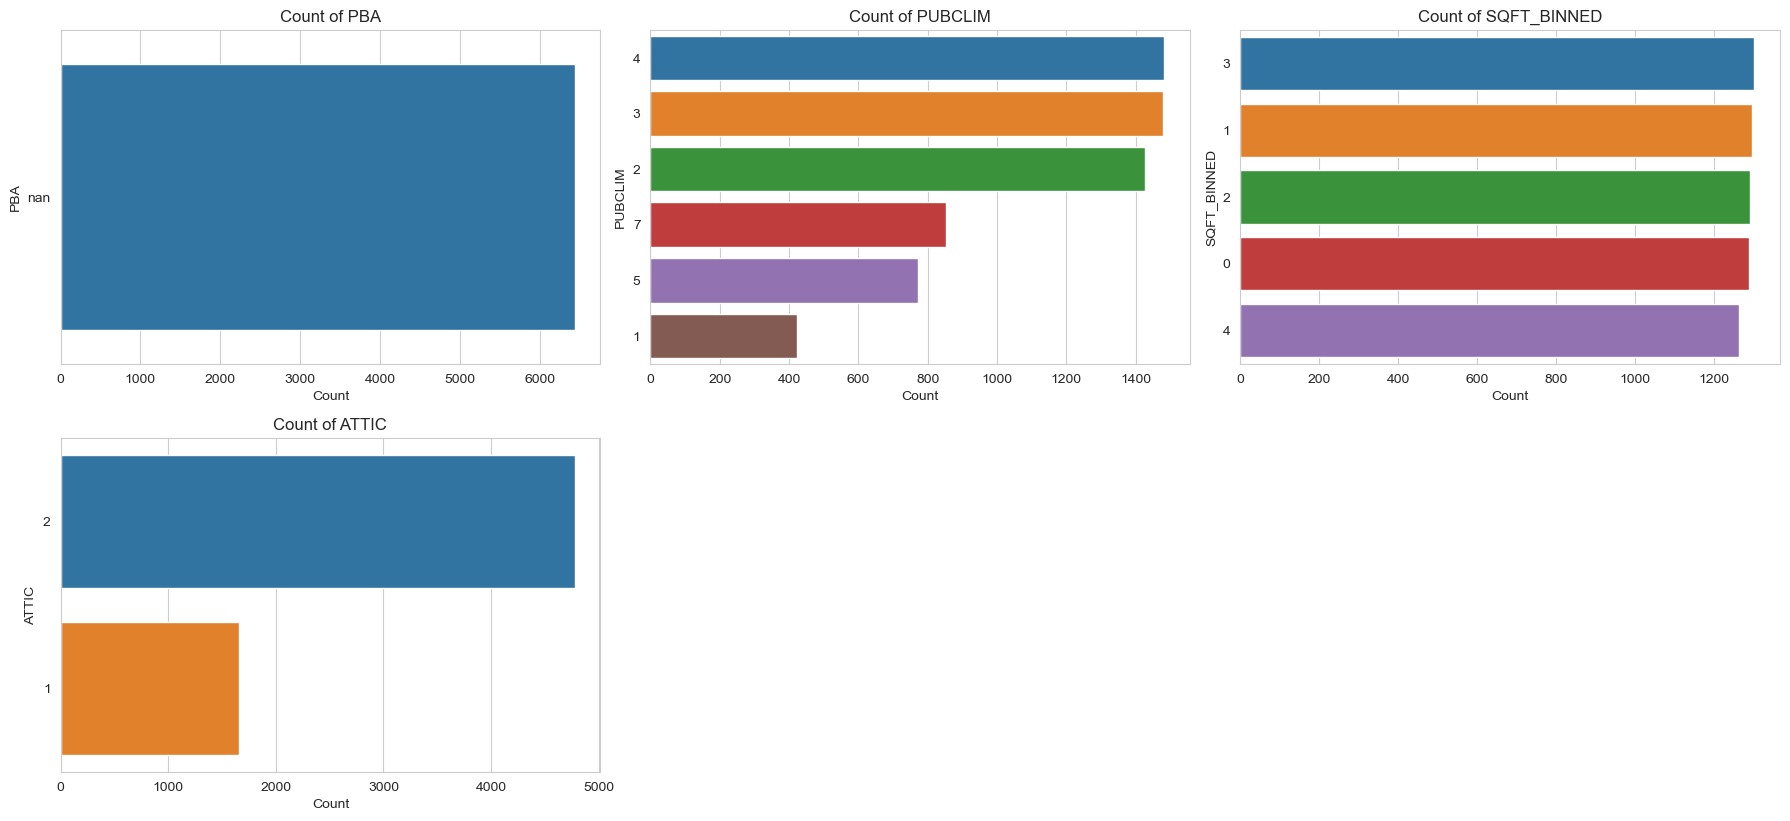

In [112]:
categorical_features_to_plot = [
    'PBA', 'PUBCLIM', 'SQFT_BINNED', 'ATTIC',
]
categorical_features_to_plot = [f for f in categorical_features_to_plot if f in X.columns]

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=X[col], order=X[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

These count plots provide insight into the composition of our categorical features.

- PBA (Principal Building Activity): Shows the distribution of different building types, with some activities (e.g., Office, Retail) being more prevalent, influencing how peer groups are formed and how heating is consumed.
- PUBCLIM (Public Climate Region): Illustrates the representation of buildings across various climate zones, directly impacting heating needs.
- SQFT_BINNED (Square Footage Binned): Reveals a relatively balanced distribution across the different size categories, which is good for model learning.
- Other features like ATTIC, BASEMNT, RENOV, HEATHOME, and AIRCOND show the prevalence or absence of certain building characteristics or systems, often with notable imbalances (e.g., more buildings without attics).

These distributions are essential for understanding the dataset's composition and for guiding one-hot encoding during preprocessing.

In [113]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   HIGH_HEATING_POTENTIAL  6436 non-null   int64
dtypes: int64(1)
memory usage: 50.4 KB


In [114]:
y.isnull().sum()

HIGH_HEATING_POTENTIAL    0
dtype: int64

In [115]:
X.isnull().sum()

HDD65          0
WKHRS          0
PUBCLIM        0
ATTIC          0
SQFT_BINNED    0
OCCUPYP        0
YRCONC         0
PBA            0
CDD65          0
RFCNS          0
WLCNS          0
dtype: int64

# MACHINE LEARNING 

This section covers the core machine learning pipeline, including data splitting, addressing class imbalance with SMOTE, training a Decision Tree Classifier, and evaluating its performance.

## Importing Libraries

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, RocCurveDisplay, roc_curve, auc

### Defining Target Columns

In [117]:
target_col = ['HIGH_HEATING_POTENTIAL']

#### Scaling Numerical Features

In [118]:
# Scale numerical features
numerical_features = [...]  # Replace with actual list of numerical features
numerical_cols_to_scale = [col for col in numerical_features if col in X_encoded.columns]
scaler = StandardScaler()
X_scaled = X_encoded.copy()
if numerical_cols_to_scale:
    X_scaled[numerical_cols_to_scale] = scaler.fit_transform(X_scaled[numerical_cols_to_scale])
    print(f"\nScaled numerical features: {numerical_cols_to_scale[:5]}...")

#### Model Defining

In [119]:
# Define the model
model = DecisionTreeClassifier(random_state=42, max_depth=8, min_samples_leaf=20)

#### Training and Evaluating the Model

In [120]:
# Split and balance the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y[target_col], test_size=0.2, random_state=42, stratify=y[target_col]
)

#### Applying SMOTE

In [121]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Training the Decision Tree Classifier

In [122]:
# train the Decision Tree Classifier
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)
print(y_pred)

[1 1 1 ... 1 1 1]


The probabilities for the positive class in the test set are obtained by selecting the second column from the output of the predict_proba method applied to X_test. Similarly, the probabilities for the positive class in the resampled training set are obtained by selecting the second column from the output of the predict_proba method applied to X_train_resampled.

In [123]:
# Get probabilities (Decision Tree has predict_proba)
y_scores = model.predict_proba(X_test)[:, 1]
y_train_scores = model.predict_proba(X_train_resampled)[:, 1]
print(y_scores[:5])
print(y_train_scores[:5])

[0.91666667 0.99460916 0.8        0.97333333 1.        ]
[0.08860759 1.         1.         0.90697674 0.08421815]


##### Interpretation
- High Probabilities: Values close to 1 indicate that the model is very confident that the instance belongs to the positive class.
- Low Probabilities: Values close to 0 indicate that the model is very confident that the instance does not belong to the positive class.
- Moderate Probabilities: Values around 0.5 suggest that the model is uncertain about the class of the instance.

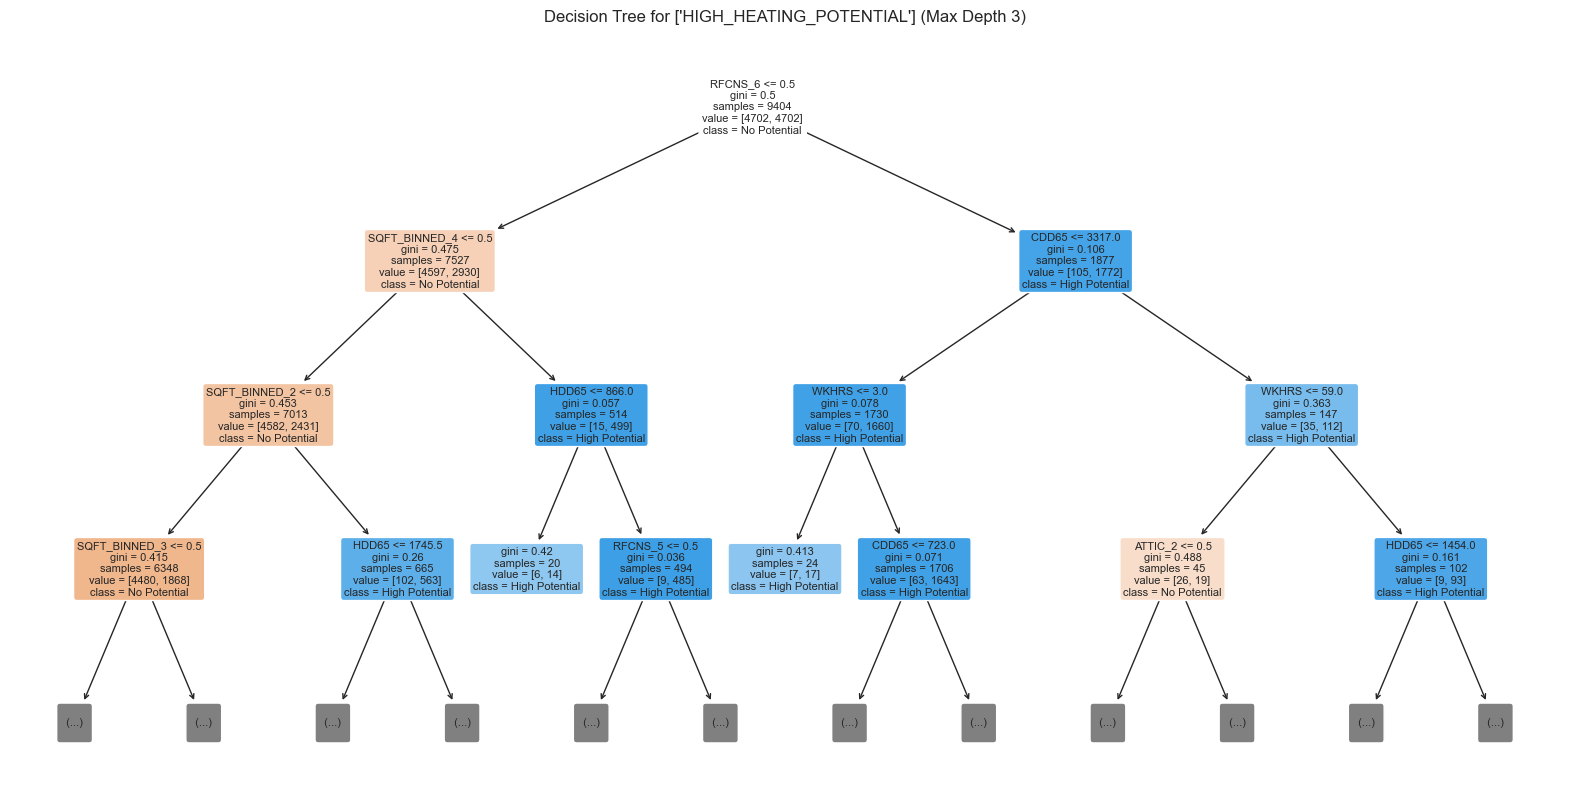

In [124]:
# Plotting the Decision Tree diagram
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_encoded.columns.tolist(),
            class_names=['No Potential', 'High Potential'],
            filled=True, rounded=True, fontsize=8, max_depth=3)
plt.title(f'Decision Tree for {target_col} (Max Depth 3)')
plt.show()

#### Classification Report

In [125]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      0.46      0.33       112
           1       0.94      0.87      0.91      1176

    accuracy                           0.84      1288
   macro avg       0.60      0.67      0.62      1288
weighted avg       0.88      0.84      0.86      1288



In [126]:
# Calculating and printing Train and Test AUC for Decision Tree
try:
    train_roc_auc = roc_auc_score(y_train_resampled, y_train_scores)
    test_roc_auc = roc_auc_score(y_test, y_scores)
    print(f"Decision Tree - Train ROC-AUC Score: {train_roc_auc:.4f}")
    print(f"Decision Tree - Test ROC-AUC Score: {test_roc_auc:.4f}")

except ValueError:
    print("Could not calculate Train/Test ROC-AUC for Decision Tree (problem with classes).")

Decision Tree - Train ROC-AUC Score: 0.9409
Decision Tree - Test ROC-AUC Score: 0.7764


The model performs well on the training data but has a lower performance on the test data. This discrepancy suggests that the model might be overfitting, meaning it has learned the training data too well and does not generalize well to new, unseen data. It might be beneficial to explore techniques to reduce overfitting, such as cross-validation, regularization, or gathering more data.

<Figure size 700x500 with 0 Axes>

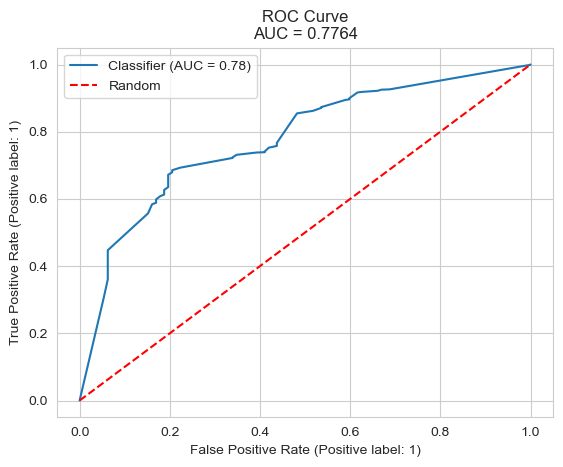

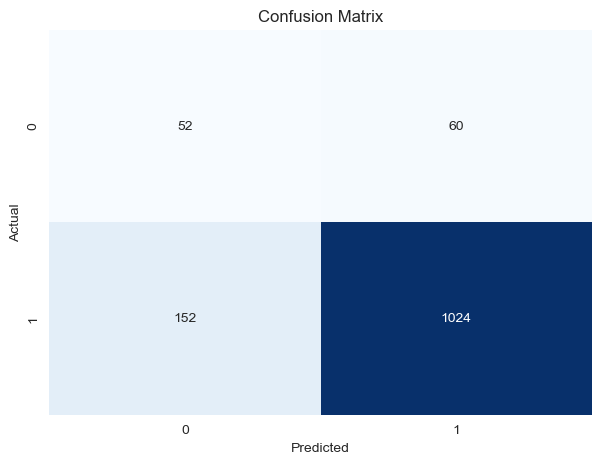

In [127]:
from sklearn.metrics import roc_auc_score, confusion_matrix, RocCurveDisplay

# Calculate ROC-AUC score
roc_auc_current = roc_auc_score(y_test, y_scores)

# Plot ROC Curve
plt.figure(figsize=(7, 5))
RocCurveDisplay.from_predictions(y_test, y_scores)
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.title(f'ROC Curve\nAUC = {roc_auc_current:.4f}')
plt.legend()
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(7, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### ROC Curve Interpreted
The AUC (Area Under the Curve) is 0.7760, which indicates the model’s ability to distinguish between buildings with and without high heating potential. An AUC of 0.7760 suggests that the model performs better than random guessing but has room for improvement. The ROC curve illustrates the trade-off between the True Positive Rate and the False Positive Rate with, the AUC score summarizing the model’s overall discriminative power.

#### Confusion Matrix Explained
The confusion matrix provides an understanding of the performance of the Decision Tree model in identifying buildings with High Heating Potential, which is the target variable. The overall problem is to identify buildings that are disproportionately inefficient in heating to recommend energy efficiency retrofits.

#### Interpretation
1. True Negatives: 52 buildings that do not have high heating potential were correctly identified by the model.
2. False Positives: 60 buildings were incorrectly flagged by the model as having high heating potential when they actually do not.
3. False Negatives: 154 buildings that actually do have high heating potential were not identified by the model. These missed opportunities for retrofits are critical to the problem statement.
4. True Positives: 1022 buildings that actually do have high heating potential were correctly identified by the model.

### Conclusion
The matrix indicates that the model is effective at identifying true positives, but the significant number of false negatives (missed opportunities) suggests that there is room for improvement in recalling all high-potential buildings.

### Recommendations for Stakeholders: Driving Heating Energy Efficiency Retrofits
The model offers a robust tool for strategically targeting buildings for heating energy efficiency improvements. The following recommendations are proposed to maximize the impact of retrofit programs:
1. Prioritized Outreach: It is recommended to use the model's predictions to identify specific commercial buildings with HIGH_HEATING_POTENTIAL. These buildings represent the most promising opportunities for significant energy savings and reduced operational costs. By directing outreach and resource allocation to these buildings first, the return on investment for retrofit programs can be maximized.
2. Tailored Solutions: While the model identifies potential, the underlying features it uses (e.g., roof construction, wall construction, year built, operating hours, climate data) provide insights into why a building might be inefficient. It is suggested to encourage follow-up with targeted energy audits that investigate these specific characteristics to propose the most effective and customized retrofit solutions (e.g., improved insulation, HVAC upgrades, building envelope sealing).
3. Data-Driven Decision Making: This model allows for a data-driven approach to energy efficiency, moving beyond general assumptions. By focusing on buildings with a quantitatively identified high potential, stakeholders can make more informed decisions, justify investments, and demonstrate tangible impacts.
4. Addressing Missed Opportunities: It is acknowledged that while the model is effective, it still has a notable number of "false negatives" (buildings with high potential that were not identified). This means some opportunities are missed. For future iterations, it is proposed to consider strategies to capture these, potentially through refining the model or incorporating additional data sources, to ensure no high-value targets are overlooked.
5. Long-Term Strategy: This model is positioned as a foundational element of a long-term energy management strategy. It enables continuous identification of high-impact retrofit candidates, contributing to sustained reductions in energy consumption, operating expenses, and carbon footprint across the commercial building stock.